# 挑戰：分析有關數據科學的文本

> *在這份筆記中，我們嘗試使用不同的 URL - 關於機器學習的維基百科文章。你會發現，與數據科學不同，這篇文章包含了許多術語，這使得分析更加困難。我們需要在進行關鍵字提取後，想出另一種方法來清理數據，以去除一些頻繁但無意義的詞組。*

在這個例子中，我們將進行一個簡單的練習，涵蓋傳統數據科學流程的所有步驟。你不需要撰寫任何程式碼，只需點擊下面的單元格執行它們並觀察結果。作為挑戰，我們鼓勵你使用不同的數據來嘗試這段程式碼。

## 目標

在這節課中，我們討論了與數據科學相關的不同概念。讓我們嘗試通過**文本挖掘**來發現更多相關概念。我們將從一段有關數據科學的文本開始，從中提取關鍵字，然後嘗試將結果可視化。

作為文本，我將使用維基百科上關於數據科學的頁面：


In [2]:
url = 'https://en.wikipedia.org/wiki/Data_science'
url = 'https://en.wikipedia.org/wiki/Machine_learning'

## 第一步：獲取資料

每個資料科學流程的第一步就是獲取資料。我們將使用 `requests` 函式庫來完成這個步驟：


In [3]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Machine learning - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"77162785-16e9-4d7f-a175-7f3fcf502a66","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Machine_learning","wgTitle":"Machine learning","wgCurRevisionId":1041247229,"wgRevisionId":1041247229,"wgArticleId":233488,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","Harv and Sfn no-target errors","CS1 maint: uses authors parameter","Articles with short description","Short description is dif

## 第 2 步：轉換資料

下一步是將資料轉換成適合處理的形式。在我們的案例中，我們已經從網頁下載了 HTML 原始碼，現在需要將其轉換成純文字。

有許多方法可以完成這項工作。我們將使用 Python 中最簡單的內建 [HTMLParser](https://docs.python.org/3/library/html.parser.html) 物件。我們需要繼承 `HTMLParser` 類別，並定義程式碼以收集所有 HTML 標籤內的文字，除了 `<script>` 和 `<style>` 標籤。


In [4]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Machine learning - Wikipedia Machine learning From Wikipedia, the free encyclopedia Jump to navigation Jump to search Study of algorithms that improve automatically through experience For the journal, see  Machine Learning (journal) . "Statistical learning" redirects here. For statistical learning in linguistics, see  statistical learning in language acquisition . Part of a series on Artificial intelligence Major goals Artificial general intelligence Planning Computer vision General game playing Knowledge reasoning Machine learning Natural language processing Robotics Approaches Symbolic Deep learning Bayesian networks Evolutionary algorithms Philosophy Ethics Existential risk Turing test Chinese room Control problem Friendly AI History Timeline Progress AI winter Technology Applications Projects Programming languages Glossary Glossary v t e Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection Data Cleaning AutoML Associ

## 第三步：獲取洞察

最重要的一步是將我們的數據轉化為可以提取洞察的形式。在我們的情況下，我們希望從文本中提取關鍵字，並找出哪些關鍵字更具意義。

我們將使用一個名為 [RAKE](https://github.com/aneesha/RAKE) 的 Python 函式庫來進行關鍵字提取。首先，讓我們安裝這個函式庫，以防尚未安裝：


In [5]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


主要功能可從 `Rake` 對象獲取，我們可以使用一些參數來自定義。在我們的情況下，我們將關鍵字的最小長度設置為 5 個字符，關鍵字在文檔中的最小頻率設置為 3，關鍵字中的最大單詞數設置為 2。可以隨意嘗試其他值並觀察結果。


In [6]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('data mining', 4.0),
 ('polynomial time', 4.0),
 ('dimensionality reduction', 4.0),
 ('anomaly detection', 4.0),
 ('data set', 4.0),
 ('bayesian networks', 4.0),
 ('language corpora', 4.0),
 ('mcgraw hill', 4.0),
 ('mit press', 4.0),
 ('retrieved 2018-08-20', 4.0),
 ('artificial neuron', 3.9642857142857144),
 ('statistical learning', 3.9470198675496686),
 ('feature learning', 3.9470198675496686),
 ('reinforcement learning', 3.9470198675496686),
 ('deep learning', 3.9470198675496686),
 ('main article', 3.9411764705882355),
 ('machine learning', 3.9144111718974948),
 ('pattern recognition', 3.9),
 ('neural networks', 3.875),
 ('artificial intelligence', 3.864285714285714),
 ('supervised learning', 3.835908756438558),
 ('speech recognition', 3.833333333333333),
 ('bayesian network', 3.833333333333333),
 ('explicitly programmed', 3.8),
 ('biological brain', 3.8),
 ('unsupervised learning', 3.780353200883002),
 ('outlier detection', 3.75),
 ('ieee transactions', 3.75),
 ('isbn 978-0-262-0

我們獲得了一份術語清單，並附上其重要性程度。如您所見，最相關的領域，例如機器學習和大數據，位於清單的前列位置。

## 第四步：結果視覺化

人們通常能以視覺形式最佳地解讀數據。因此，將數據進行視覺化以獲取一些洞察通常是合理的。我們可以使用 Python 中的 `matplotlib` 庫來繪製關鍵字及其相關性的簡單分佈圖：


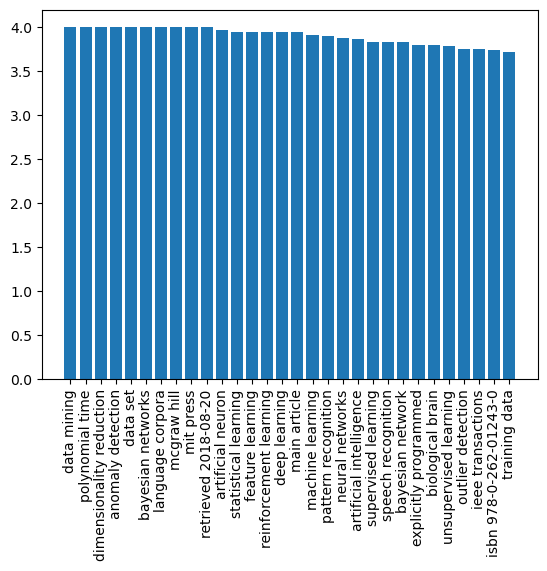

In [9]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res[:30])

然而，還有一種更好的方式來視覺化詞頻——使用**文字雲**。我們需要安裝另一個庫來從我們的關鍵詞列表中繪製文字雲。


In [71]:
!{sys.executable} -m pip install wordcloud

`WordCloud` 物件負責接收原始文本或預先計算的單詞及其頻率列表，並返回一個圖像，隨後可使用 `matplotlib` 顯示：


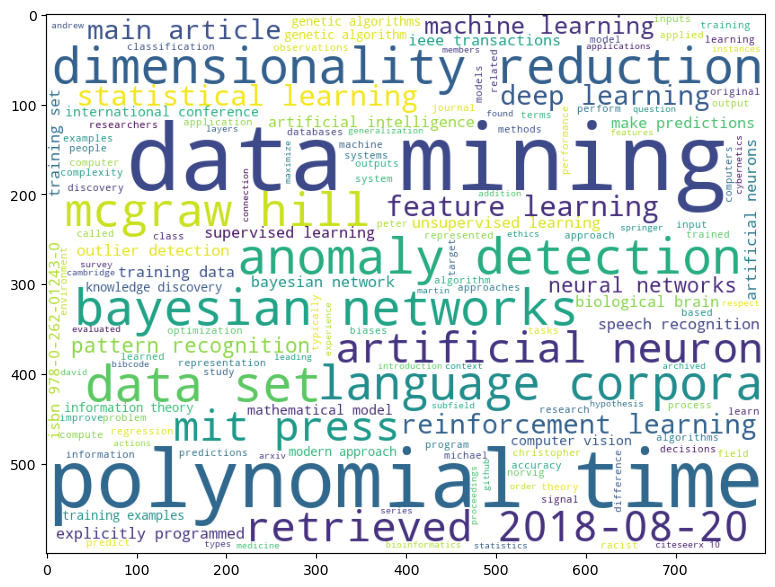

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))
plt.show()

我們也可以將原始文本傳遞給 `WordCloud` - 讓我們看看是否能夠獲得類似的結果：


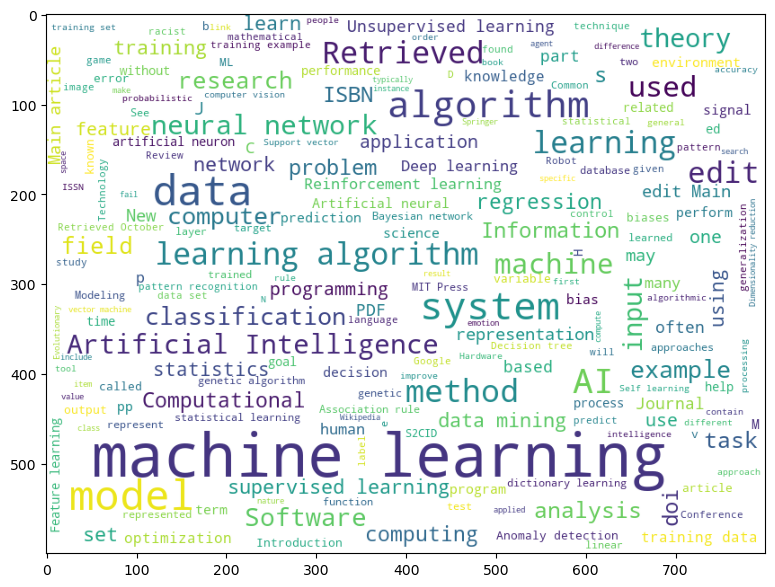

In [13]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))
plt.show()

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

你可以看到，現在的文字雲看起來更吸引人，但同時也包含了許多雜訊（例如，像 `Retrieved on` 這樣無關的詞彙）。此外，我們獲得的雙詞關鍵字（例如 *data scientist* 或 *computer science*）也變少了。這是因為 RAKE 演算法在從文本中選取優質關鍵字方面表現得更好。這個例子說明了資料前處理和清理的重要性，因為最終清晰的結果能幫助我們做出更好的決策。

在這個練習中，我們簡單地從維基百科的文本中提取了一些意義，以關鍵字和文字雲的形式呈現。這個例子雖然簡單，但很好地展示了資料科學家在處理資料時通常會採取的所有步驟，從資料獲取到視覺化。

在我們的課程中，我們將詳細討論這些步驟。



---

**免責聲明**：  
本文件使用 AI 翻譯服務 [Co-op Translator](https://github.com/Azure/co-op-translator) 進行翻譯。我們致力於提供準確的翻譯，但請注意，自動翻譯可能包含錯誤或不準確之處。應以原始語言的文件作為權威來源。對於關鍵資訊，建議尋求專業人工翻譯。我們對因使用此翻譯而產生的任何誤解或錯誤解讀概不負責。
